### Лабораторная работа №3. Маркоские цепи
Выполнили студенты: Петренко Людмила М33001, Кусайкина Елизавета М33001, Шалимов Иван М33021

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# распределение по состояниям, численное решение
def probability_distribution_numeric(matrix, initial_state, eps = 1e-6, steps = 1000):
    mean_average_square_error = []
    state = np.copy(initial_state)
    step = 0
    while step < steps:
        new_state = np.matmul(state, matrix)
        mase = np.std(np.abs(state - new_state))
        if mase < eps:
            break
        
        mean_average_square_error.append(mase)
        state = new_state
        step += 1
    
    return state, mean_average_square_error, step

# распределение по состояниям, аналитическое решение
def probability_distribution_analytic(matrix):
    matrix_minus_single = matrix - np.eye(matrix.shape[0])
    b = np.zeros(matrix.shape[0])
    matrix_minus_single[-1] = np.ones(matrix.shape[0])
    b[-1] = 1
    return np.linalg.solve(matrix_minus_single, b)

In [18]:
initial_state_1 = [0, 0, 0, 0, 0, 1, 0, 0]
initial_state_2 = [0, 1, 0, 0, 0, 0, 0, 0]

matrix = [[0.13, 0.5, 0, 0, 0.37, 0, 0, 0], 
          [0.5, 0.05, 0.05, 0, 0, 0.1, 0, 0.3],
		  [0, 0.05, 0.4, 0.1, 0.15, 0.3, 0, 0],
		  [0, 0, 0.1, 0.3, 0.15, 0, 0.45, 0],
	      [0.37, 0, 0.15, 0.15, 0.13, 0.2, 0, 0],
		  [0, 0.1, 0.3, 0, 0.2, 0.05, 0.05, 0.3],
		  [0, 0, 0, 0.45, 0, 0.05, 0.2, 0.3],
	      [0, 0.3, 0, 0, 0, 0.3, 0.3, 0.1]]

In [22]:
state1, mase_1, step_1 = probability_distribution_numeric(np.array(matrix), np.array(initial_state_1))
state2, mase_2, step_2 = probability_distribution_numeric(np.array(matrix), np.array(initial_state_2))

print(state1, state2)

[0.12500473 0.12500405 0.12500067 0.12499396 0.12500235 0.12500085
 0.12499415 0.12499922] [0.12500532 0.1250032  0.12500067 0.12499436 0.12500184 0.12500085
 0.1249941  0.12499967]


23 27


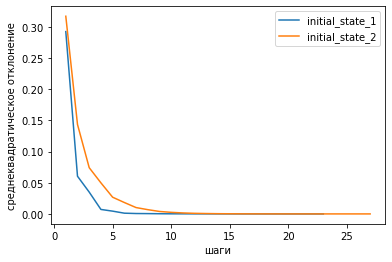

In [45]:
print(step_1, step_2)
plt.plot(np.arange(1, step_1 + 1, 1), np.array(mase_1), label='initial_state_1')
plt.plot(np.arange(1, step_2 + 1, 1), np.array(mase_2), label='initial_state_2')
plt.xlabel('шаги')
plt.ylabel('среднеквадратическое отклонение')
plt.legend()
plt.show()

In [65]:
print(probability_distribution_analytic(np.array(matrix)))

[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
